1 - upsampling
2 - downsampling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#set the random seed for reproducibility
np.random.seed(123)
# Create a dataframe with 2 classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [3]:
n_class_0

900

In [4]:
n_class_1

100

In [5]:
class_0 = pd.DataFrame({
    #this created normal distributed data
    'feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0] * n_class_0
})
class_1 = pd.DataFrame({
    #this created normal distributed data
    'feature_1' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1] * n_class_1
})


In [6]:
class_0

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [7]:
class_1

,feature_1,feature_2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1
...,...,...,...
95,1.376371,2.845701,1
96,2.239810,0.880077,1
97,1.131760,1.640703,1
98,2.902006,0.390305,1


In [8]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

<Axes: ylabel='Count'>

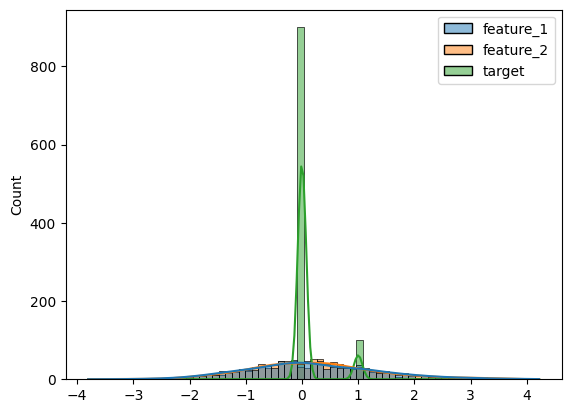

In [9]:
# dataset Distribution
sns.histplot(df,kde=True)

In [10]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [11]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [12]:
# Upsampling

In [13]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [14]:
df_majority

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [15]:
df_minority

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [16]:
# Upsampling perform

In [17]:
from sklearn.utils import resample

In [18]:
df_minority_upsample = resample(df_minority,
                                replace= True, #Sample with replacement
                                n_samples= len(df_majority),# to match the majority class
                                random_state=42)

In [19]:
df_minority_upsample.shape

(900, 3)

In [20]:
df_minority_upsample['target'].value_counts()

target
1    900
Name: count, dtype: int64

In [21]:
df_upsampled = pd.concat([df_majority,df_minority_upsample])

In [22]:
df_upsampled.reset_index(drop=True,inplace=True)

In [23]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

<Axes: ylabel='Count'>

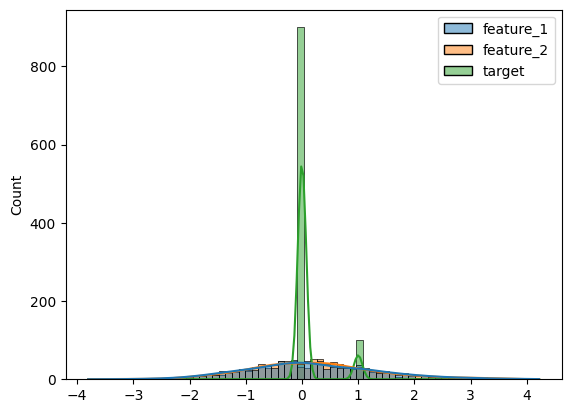

In [24]:
#Old dataset
sns.histplot(df,kde=True)

<Axes: ylabel='Count'>

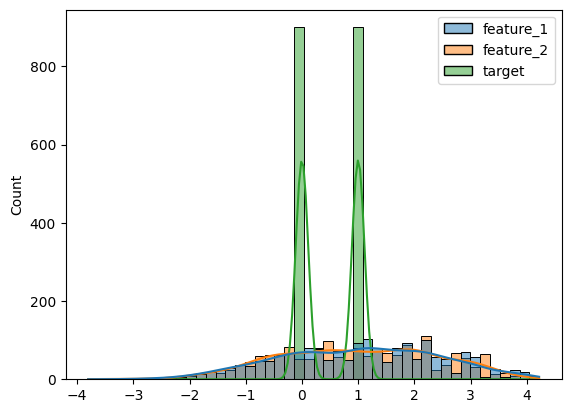

In [25]:
#New Dataset
sns.histplot(df_upsampled,kde = True)

In [26]:
df_upsampled.shape

(1800, 3)

In [27]:
#Downsampling

In [28]:
class_0 = pd.DataFrame({
    #this created normal distributed data
    'feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0] * n_class_0
})
class_1 = pd.DataFrame({
    #this created normal distributed data
    'feature_1' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1] * n_class_1
})


In [29]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [30]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [31]:
df_majority_downsample = resample(df_majority,
                                replace= False, #Sample with replacement
                                n_samples= len(df_minority),# to match the majority class
                                random_state=42)

In [32]:
df_majority_downsample.shape

(100, 3)

In [33]:
df_downsample = pd.concat([df_minority,df_majority_downsample])

<Axes: ylabel='Count'>

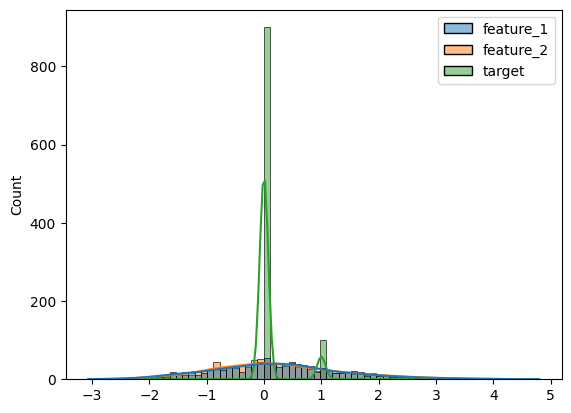

In [34]:
#old Dataset
sns.histplot(df,kde=True)

<Axes: ylabel='Count'>

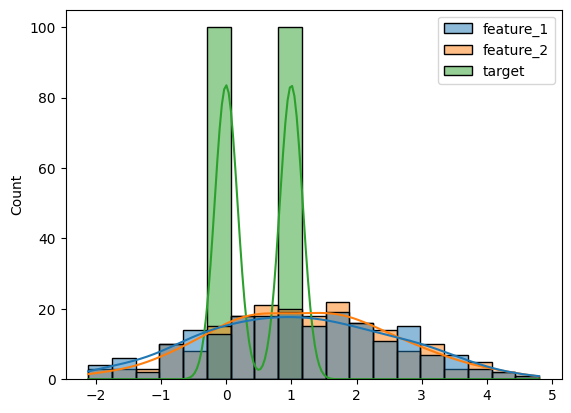

In [35]:
#New Dataset
sns.histplot(df_downsample,kde=True)